## MICROSOFT PROJECT

### BUSINESS UNDERSTANDING

Microsoft wants to establish a movie studio but has little or knowledge of what it entails to really hit the ground running and make profits in the film industry. Luckily, there is some data available which can be analyzed to come up with actionable insights for the executives. I'll use the following datasets for this project:
* bommovie dataset
* movie_info dataset 
* IM.db database 

In this project, i will be looking to investigate the following business questions:
 * Who are the potential competitors who are currently operating in the market?
 * How does the domestic and foreign markets compare? 
 * Which genres are currently fetching top dollar in the boxoffice?
 * Does the length of a film affect its popularity and consequently its revenues?
 * Which genres are currently having the highest popularity?

### Import important libraries for data wrangling, database connection and visualization 

In [57]:
# importing libraries 
import pandas as pd 

import sqlite3

import matplotlib.pyplot as plt

import seaborn as sns 

## 1. (a) Importing the bommovie dataset and understanding the data

This dataset has columns such as:
* Title of the film
* Studio that produced film
* Domestic_gross profits
* Foreign_gross profits
* Year when the film was produced

In [58]:
# reading in the data
bommovie = pd.read_csv('zippedData/bom.movie_gross.csv.gz')  

In [59]:
# checking the first rows of the data
bommovie.head()  

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [60]:
# checking structure and missing values
bommovie.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [61]:
# descriptive statistics
bommovie.describe() 

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


### (b)Data preparation and cleaning of bommovie dataset

Data cleaning and preparation will involve:
* Checking for missing values 
* Dropping missing values if need be
* Ensuring that all columns are have the expected data type

In [62]:
# checking for any missing values in the columns 
bommovie.isnull().any() 

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [63]:
# checking the amount of missing values for each of the columns 
bommovie.isnull().sum() 

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

There seems to be having a lot of films where foreign_gross is missing.   This is probably because such films only made profits in the domestic market or were targetting the domestic and therefore did not make money in the foreign market.There is also evidence of films that did not have data on the Domestic market.It can suggest that such films did not make profits in domestic market. We will drop all rows with missing values so as to work with a dataset with where are rows have data.


Dropping all rows with missing data seems to the most sensible approach as there are just too many rows missing data especially on the foreign_gross column. Additionally, we would want to investigate films with have both domestic and foreign audiences

In [64]:
# dropping all missing values
bommovie_clean = bommovie.dropna()  

In [65]:
# checking on the structure of the new data. 
bommovie_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [66]:
# descriptive statistics of the dataset
bommovie_clean.describe() 

,domestic_gross,year
count,2.007000e+03,2007.000000
mean,4.701984e+07,2013.506228
std,8.162689e+07,2.597997
min,4.000000e+02,2010.000000
25%,6.700000e+05,2011.000000
50%,1.670000e+07,2013.000000
75%,5.605000e+07,2016.000000
max,9.367000e+08,2018.000000


In [69]:
# dropping any duplicated rows
bommovie_clean = bommovie_clean.drop_duplicates()

#### (b.i)Converting the column 'foreign gross' to a float type

The foreign_gross column seems to be a string. The expectation would be for it to be numeric column for the amount of money made in the foreign market

In [70]:
# converting foreign gross to float
foreign_gross_float = bommovie_clean['foreign_gross'].str.replace(',', '').astype(float) 

In [71]:
# convert from series to dataframe
df_foreign = pd.DataFrame(foreign_gross_float)  

In [72]:
# join the two dataframes
bommovie_clean = pd.concat([bommovie_clean, df_foreign], axis=1) 

In [73]:
# select foreign_gross as float and drop foreign_gross as object
bommovie_clean = bommovie_clean.iloc[:,[0,1,2,4,5]]  

In [74]:
# check the new dataframe's col types
bommovie_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   year            2007 non-null   int64  
 4   foreign_gross   2007 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


Everything looks good now as the foreign gross column is of a type numeric

#### (b.ii)Creating a new column total_gross = domestic_gross + foreign_gross

In [75]:
# creating a new column 'foreign_gross'
bommovie_clean['total gross'] = bommovie_clean['domestic_gross'] + bommovie_clean['foreign_gross']  

In [76]:
bommovie_clean.head()

,title,studio,domestic_gross,year,foreign_gross,total gross
0,Toy Story 3,BV,415000000.0,2010,652000000.0,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,2010,691300000.0,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010,664300000.0,9.603000e+08
3,Inception,WB,292600000.0,2010,535700000.0,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,2010,513900000.0,7.526000e+08


In [77]:
# ninetieth percentile
ninetieth_quantile = bommovie_clean['domestic_gross'].quantile(0.9)   

In [78]:
# studios in the ninetieth percentile
top_domestic_films = bommovie_clean.loc [bommovie_clean['domestic_gross'] > ninetieth_quantile]

### (c)Who are the current the big players in the film industry?

### Domestic market big players

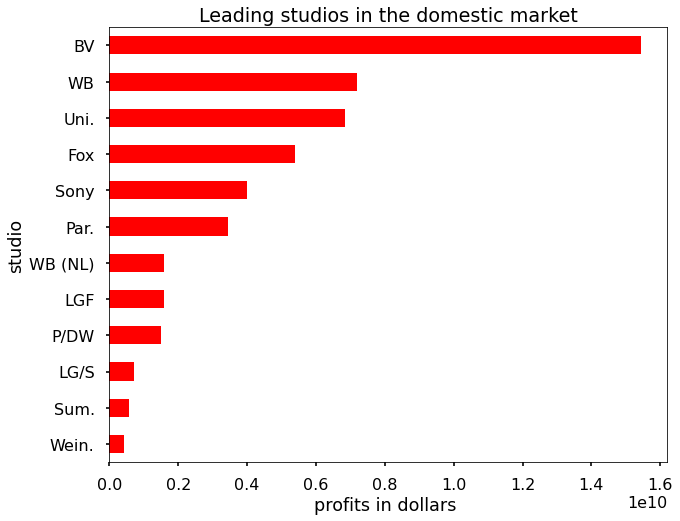

In [79]:
# data visualization
plt.style.use('seaborn-poster')
ax = top_domestic_films.groupby("studio")['domestic_gross'].agg('sum').sort_values().plot.barh(color="red",figsize=(10,8))
ax.set_title("Leading studios in the domestic market")
ax.set_xlabel("profits in dollars ");

### Foreign market big players

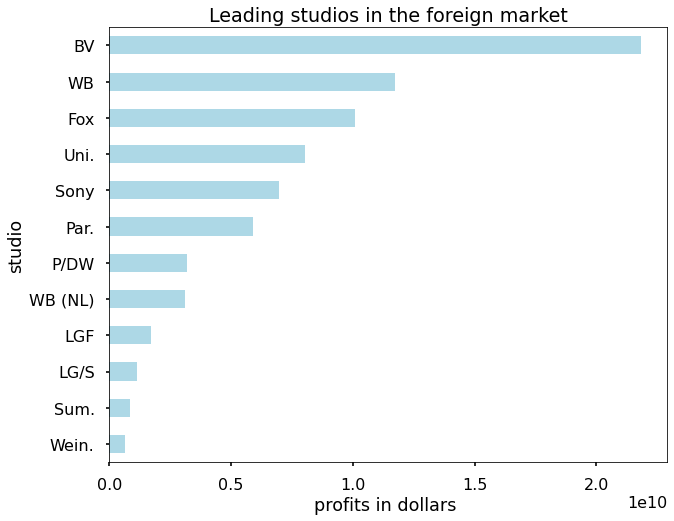

In [80]:
# data visualization
ax = top_domestic_films.groupby("studio")['foreign_gross'].agg('sum').sort_values().plot.barh(color="lightblue",figsize=(10,8))
ax.set_title("Leading studios in the foreign market")
ax.set_xlabel("profits in dollars ");

### Overall big players in the film industry

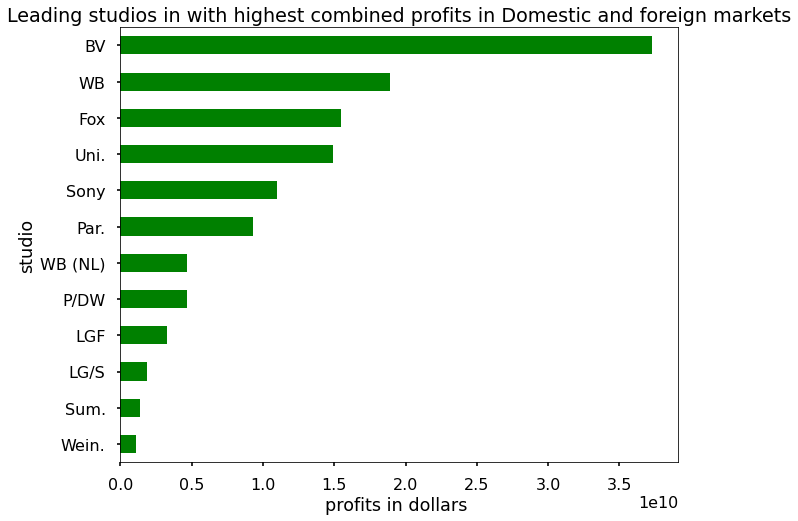

In [82]:
#data visualization
ax = top_domestic_films.groupby("studio")['total gross'].agg('sum').sort_values().plot.barh(color="green",figsize=(10,8))
ax.set_title("Leading studios in with highest combined profits in Domestic and foreign markets");
ax.set_xlabel("profits in dollars ");

It is very important to understand potential and existing competitors in the market and how much profits they are making.

Currently, the big names who are raking in the profits include:
* Buena Vista studios a subsidiary of Walt Sidney studios
* Warner Bros
* Universal studios
* Fox studios
* Sony pictures
* Paramount pictures
* Lions Gate 
* Dream Work pictures

### (d) Is the foreign market larger than the domestic market?

In [83]:
# average profits in the domestic market
bommovie_clean['domestic_gross'].mean()  

47019840.20179372

In [84]:
# average profits in the foreign market
bommovie_clean['foreign_gross'].mean() 

75790384.84130543

In [85]:
# creating a dataframe 
market= ['domestic','foreign']
average_profits = [47019840.20179372, 75790384.84130543]
zipped = list(zip(market,average_profits))
df = pd.DataFrame(zipped, columns=['market', 'average_profits ']) 

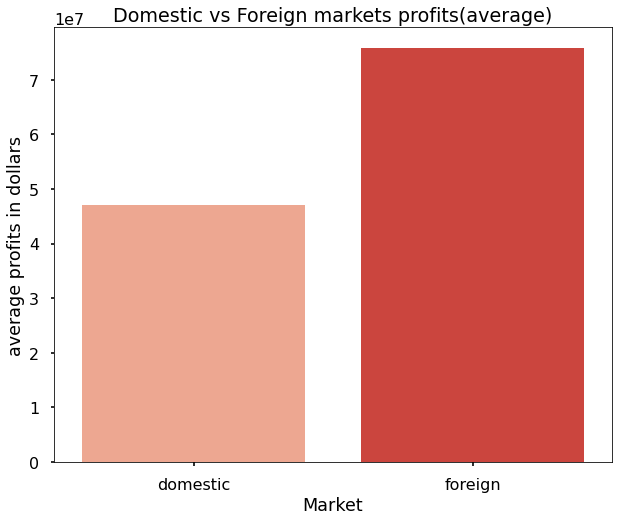

In [86]:
# data visualization
plt.figure(figsize=(10,8))
ax =sns.barplot(x=market,y=average_profits, data= df,palette='Reds')
ax.set_title("Domestic vs Foreign markets profits(average)")
ax.set_ylabel("average profits in dollars")
ax.set_xlabel("Market");

It is evident from the barplot that foreign markets bring in more money than the domestic market. It is important to point out that both markets are important for profit maximization. Foreign markets are likely to generate extra revenue because they serve a larger audience compared to the domestic market. Investing in movies that command foreign markets would give an opportunity to make some bit of more money than a film that would onyl command domestic audience. However, caution should be taken as foreign markets require more funding as films need serious marketing to gain attraction and attract audiences.

## 2. (a) Importing the movie_info dataset and understanding the data

This dataset contains columns such as:
* genre
* director
* box_office revenue
* runtime 

Special focus will be given to genre and box_office revenue to investigate which genres make more money at the box_office

In [24]:
# reading in the data 
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz',delimiter="\t" , encoding = 'latin1')

In [25]:
# checking for the first 3 rows of the dataset
movie_info.head(3) 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [26]:
# checking data types and missing values
movie_info.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [91]:
# descriptive statistics
movie_info.describe()  

,id
count,235.000000
mean,1010.217021
std,578.522979
min,3.000000
25%,488.500000
50%,1044.000000
75%,1526.000000
max,1985.000000


In [92]:
# dropping all missing values
movie_info = movie_info.dropna()  

In [93]:
# drop any duplicated rows
movie_info = movie_info.drop_duplicates()

In [94]:
# converting box_office to float
Box_office = movie_info['box_office'].str.replace(',', '').astype(float) # converting box_office to float

In [95]:
# creating a dataframe 
df = pd.DataFrame(Box_office) 

### (b) Which are the top ten highest earning genres in the boxoffice?

In [96]:
# binding box_office float to the other dataframe
genre_boxoffice = pd.concat([movie_info, df], axis=1) 

In [97]:
# selecting genre, box-office object and box-office float
genre_boxoffice = genre_boxoffice[['genre','box_office','box_office']]

In [98]:
# selecting columns (genre and box_office as float)
box_office = genre_boxoffice.iloc[:,[0,2]] 

In [99]:
# grouping by genre/total box_office
grouped = box_office.groupby('genre')['box_office'].sum().sort_values(ascending=False) 

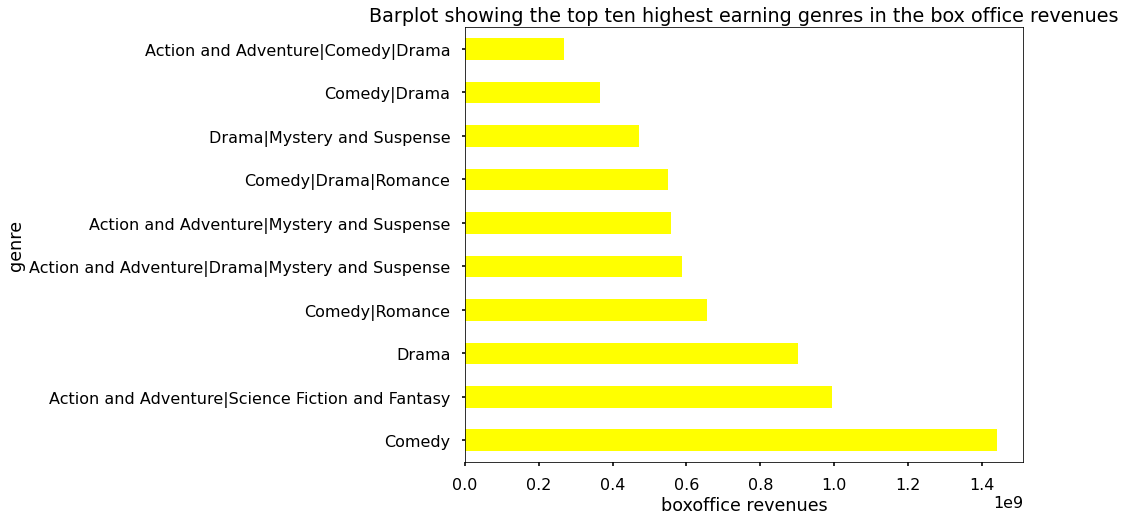

In [100]:
# first ten rows with the highest box_office revenues
ax =grouped[0:10].plot.barh(color="yellow",figsize=(10,8));  
ax.set_xlabel('boxoffice revenues')
ax.set_title('Barplot showing the top ten highest earning genres in the box office revenues');

If there one thing the barplot above communicates so loudly is that comedies are a huge hit in the box office. Humans are particularly social beings and being happy is one of the most sought after feelings. Laughter is infectious and so are comedy films. Comedy movies make good money on the box office because they do not require huge budgets to produce and can market themselves pretty much easily as someone is likely to recommend it to someone else. Additionally, cross-genre comedies make comedy films to be so attractive as comedy can be wrapped around any plot. Following closely is drama which shares tha same characteristics with comedy films for being versartile and costing less in production. Another genre that is also reaping big profits in the box office is the mystery and suspense genre coupled with action and adventure which is also popular for its versatility and ease of intergration into other genres.

### 3. IM.DB database

In [35]:
# unzipping file
import zipfile
with zipfile.ZipFile("zippedData/im.db.zip","r") as zip_ref:
    zip_ref.extractall("zippedData/")

In [101]:
# creating a connection to the database
conn = sqlite3.connect('zippedData/im.db')  
cur = conn.cursor()
cur.execute("""
            SELECT name
            FROM sqlite_master
            WHERE type = 'table'
            ;
            """
           )
tables = cur.fetchall()
tables # checking the tables in the database

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

Special focus will be given on the movie_basics and movie_ratings table

In [38]:
# getting a feel of the movie_ratings table
pd.read_sql("""
SELECT *
FROM movie_ratings;""", conn).head()  

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [39]:
# getting a feel of the movie_basics table 
pd.read_sql("""
SELECT *
FROM movie_basics;""", conn).head()  

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [40]:
# combining the movie_basics table with the movie_ratings table using the movie_id column
table = pd.read_sql("""
SELECT averagerating, primary_title, genres, runtime_minutes
FROM movie_ratings 
JOIN movie_basics 
    USING(movie_id);""",conn)    

In [41]:
# checking the first five rows of the data
table.head()

,averagerating,primary_title,genres,runtime_minutes
0,8.3,Laiye Je Yaarian,Romance,117.0
1,8.9,Borderless,Documentary,87.0
2,6.4,Just Inès,Drama,90.0
3,4.2,The Legend of Hercules,"Action,Adventure,Fantasy",99.0
4,6.5,Até Onde?,"Mystery,Thriller",73.0


In [42]:
# checking on the data types and missing values in the dataframe
table.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   averagerating    73856 non-null  float64
 1   primary_title    73856 non-null  object 
 2   genres           73052 non-null  object 
 3   runtime_minutes  66236 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.3+ MB


In [53]:
# descriptive statistics
table.describe()  

,averagerating,runtime_minutes
count,65720.000000,65720.000000
mean,6.320902,94.732273
std,1.458878,209.377017
min,1.000000,3.000000
25%,5.500000,81.000000
50%,6.500000,91.000000
75%,7.300000,104.000000
max,10.000000,51420.000000


In [43]:
# assigning it to an variable and dropping missing values 
table = table.dropna()  

### (a)How does the runtime of a film affect its average rating?

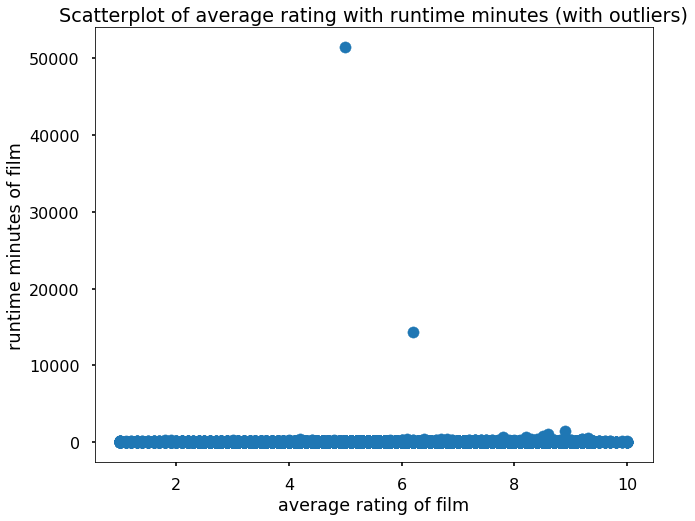

In [44]:
# data visualization
plt.figure(figsize=(10,8))
plt.scatter(table.averagerating, table.runtime_minutes)
plt.xlabel("average rating of film")
plt.ylabel('runtime minutes of film')
plt.title('Scatterplot of average rating with runtime minutes (with outliers)')
plt.show();

In [45]:
# finding more about the outliers
table.loc[table['runtime_minutes'] > 10000]  

,averagerating,primary_title,genres,runtime_minutes
12828,6.2,Modern Times Forever,Documentary,14400.0
44210,5.0,Logistics,Documentary,51420.0


After plotting the scatterplot, there was an obvious case of outliers. A closer look at these revealed that they indeed were real films which had records for being among the longest movies to be ever produced. Although this is absurd, it is expected that documentaries will have a longer runtime_minutes than other films 

In [46]:
# remove outliers using the data in the 90th percentile
table_normal = table.loc[table['runtime_minutes'] < table['runtime_minutes'].quantile(0.9)]  

In [ ]:
# We will use data in within the 90th percentile so as to remove outliers so as it have a reasonable scatter plot

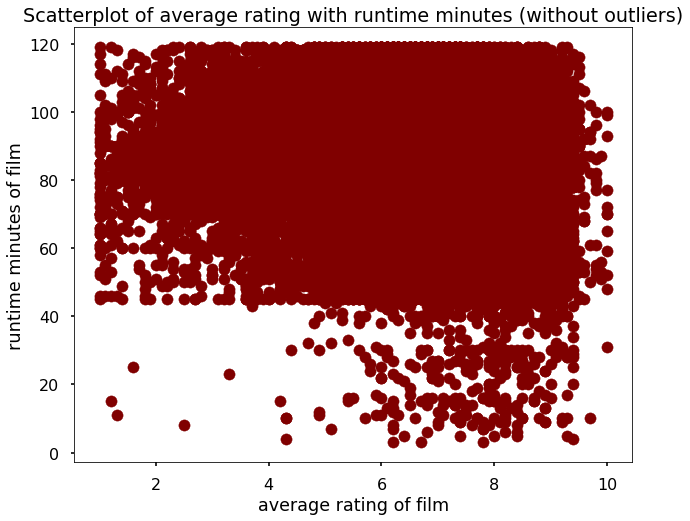

In [47]:
# data visualization
plt.figure(figsize=(10,8))
plt.scatter(table_normal.averagerating, table_normal.runtime_minutes, color="maroon")
plt.xlabel("average rating of film")
plt.ylabel('runtime minutes of film')
plt.title('Scatterplot of average rating with runtime minutes (without outliers)')
plt.show();

It is very clear that movies need to range between approximately from one hour to two ( 60 minutes to 120 minutes) inorder to get a high rating which translates to more popularity which is likely to boost returns

 ### (b)Which are the top ten highly rated genres?

In [48]:
# grouping by genre
rating = table.groupby('genres')['averagerating'].mean().sort_values(ascending=False)  

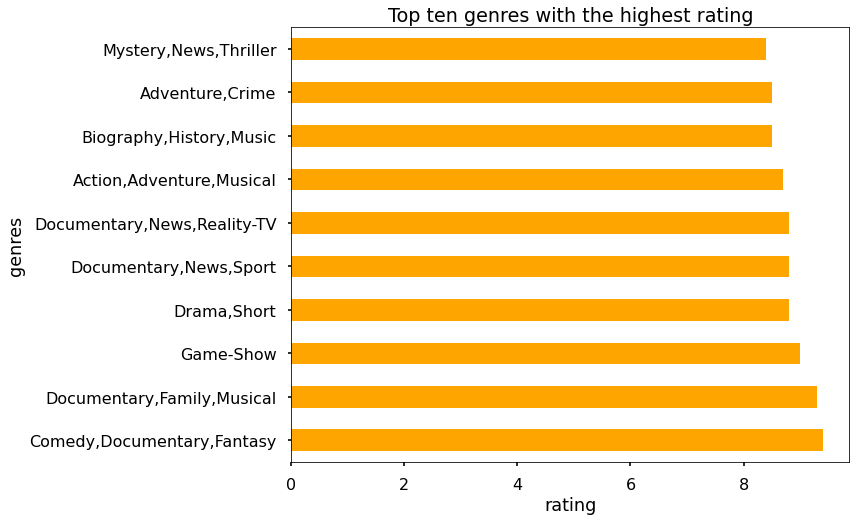

In [49]:
# data visualization
ax = rating.iloc[0:10].plot.barh(color="orange",figsize=(10,8))
ax.set_xlabel('rating')
ax.set_title('Top ten genres with the highest rating');

The barplot above points out to a particular trend where cross-genre documentaries, reality_tv, history, sport, drama and game-show attract a high rating. Of particular focus is the documentary genre which seems to be popular with many. This could be the case because documentaries talk about real people, real events and occasions which can resonate with people easily.